In [22]:
import pandas as pd
import matplotlib.pyplot as plt

Steps 

- monthly data --> downsampled
- what temperature? -> 
- selected 1940-2020s --> subsetting 
- globally averaged --> single station 
- compared to preindustrial --> compare to 1900-1940? 


In [5]:
data = pd.read_csv('../data/USC00442208_19000101-20240122.csv',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                parse_dates = ['DATE'],
                #  Set DATE as the index so you can subset data by time period
                index_col = ['DATE']
                  )


data.head()

,STATION,NAME,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
DATE,,,,,,,,,,,
1900-01-01,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,-5.6,-14.4,NaN,NaN
1900-01-02,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,1.7,-17.2,NaN,NaN
1900-01-03,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,2.8,-12.8,NaN,NaN
1900-01-04,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,5.6,-16.1,NaN,NaN
1900-01-05,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,11.7,-5.6,NaN,NaN


In [6]:
data.describe()


,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
count,9.000000,9.000000,44847.000000,42839.000000,39628.000000,44855.000000,44801.000000,44373.000000,2440.000000
mean,2.777778,11.844444,2.565030,1.822522,6.303144,18.604945,5.255697,12.592921,5.368402
std,1.641476,10.479040,7.195768,15.379604,33.223893,9.941317,9.131053,9.923029,36.966610
min,2.000000,0.000000,0.000000,0.000000,0.000000,-13.300000,-31.700000,-51.100000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,10.600000,-1.700000,4.400000,0.000000
50%,2.000000,11.400000,0.000000,0.000000,0.000000,20.000000,5.600000,13.300000,0.000000
75%,3.000000,19.800000,1.300000,0.000000,0.000000,27.200000,13.300000,21.100000,0.000000
max,7.000000,29.700000,254.000000,610.000000,762.000000,40.600000,32.200000,38.300000,635.000000


In [11]:
columns = ['TMAX', 'TMIN']
dataTemp = data[columns].copy()

dataTemp

,TMAX,TMIN
DATE,,
1900-01-01,-5.6,-14.4
1900-01-02,1.7,-17.2
1900-01-03,2.8,-12.8
1900-01-04,5.6,-16.1
1900-01-05,11.7,-5.6
...,...,...
2024-01-18,NaN,NaN
2024-01-19,NaN,NaN
2024-01-20,NaN,NaN


In [14]:
dataTempMonthly = dataTemp.resample('MS').mean()
dataTempMonthly


,TMAX,TMIN
DATE,,
1900-01-01,8.816129,-6.603226
1900-02-01,6.414286,-8.282143
1900-03-01,10.774194,-4.912903
1900-04-01,19.543333,2.110000
1900-05-01,26.426667,6.812903
...,...,...
2023-09-01,26.746667,11.753846
2023-10-01,21.660000,5.480000
2023-11-01,14.110000,-1.723333


<AxesSubplot:xlabel='DATE'>

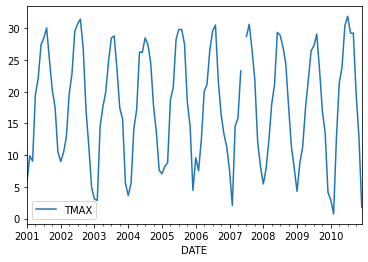

In [15]:
dataTempMonthly["2001":"2010"].plot(y='TMAX')

In [17]:
# change x-axis 
dataTempMonthly['Month']=dataTempMonthly.index.month
dataTempMonthly

,TMAX,TMIN,Month
DATE,,,
1900-01-01,8.816129,-6.603226,1
1900-02-01,6.414286,-8.282143,2
1900-03-01,10.774194,-4.912903,3
1900-04-01,19.543333,2.110000,4
1900-05-01,26.426667,6.812903,5
...,...,...,...
2023-09-01,26.746667,11.753846,9
2023-10-01,21.660000,5.480000,10
2023-11-01,14.110000,-1.723333,11


<AxesSubplot:xlabel='Month'>

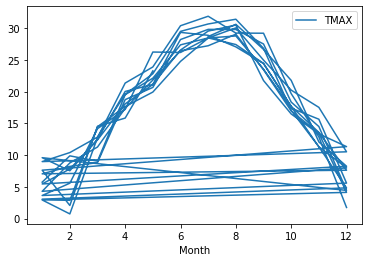

In [18]:
dataTempMonthly["2001":"2010"].plot(y='TMAX',x='Month')

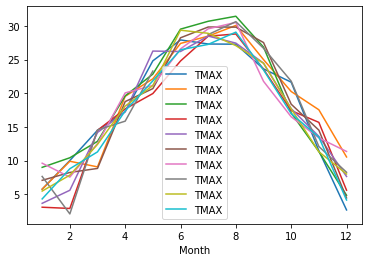

In [32]:
fig, ax = plt.subplots()

for i in range(2000,2010):
    start = str(i)
    dataTempMonthly.loc[start].plot(y='TMAX',x='Month', ax=ax, legend = 'False')

#dataTempMonthly.loc["2000"]


<AxesSubplot:xlabel='month'>

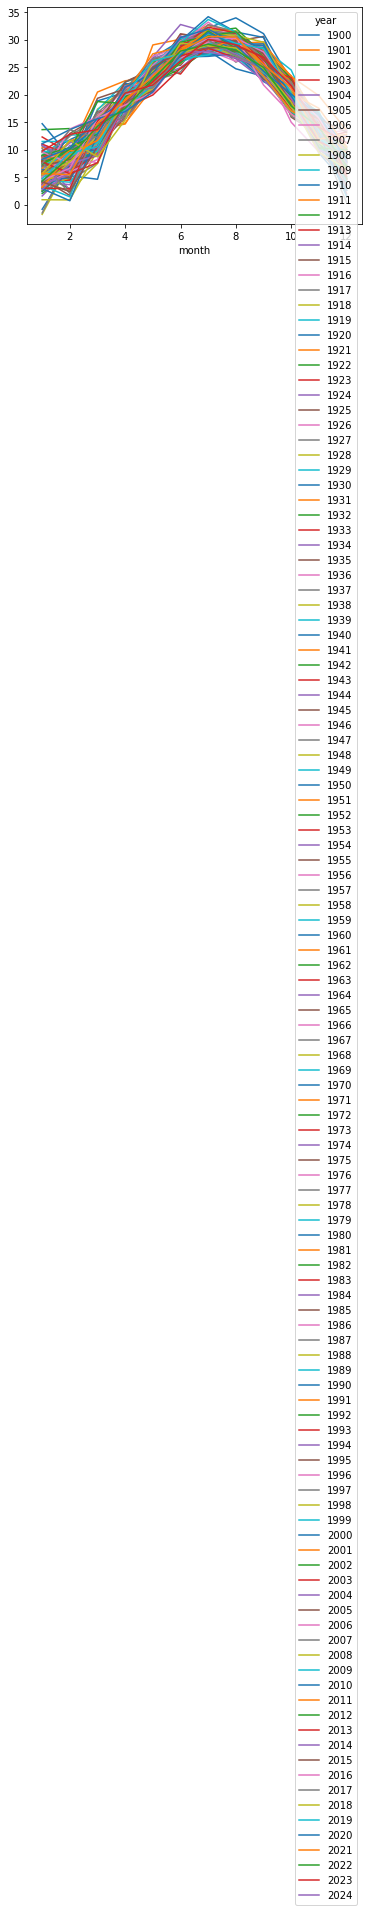

In [61]:
df_monthly['month']=df_monthly.index.month
df_monthly['year']=df_monthly.index.year
pd.pivot_table(df_monthly, values='TMAX', index=['year'],
                       columns=['month'], aggfunc="mean").T.plot()